In [2]:
#intalar librerira
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# Carga dataframe
nba = pd.read_csv(r'C:\Users\jmarcos\Desktop\cienciadedatos\Examen\nba_logreg2.csv', sep = ";")
nba.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
#Descripcion de datos
nba.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
#Selección de variables continuias
v_con = nba.drop(columns = ['Name', 'TARGET_5Yrs'])
v_con

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8
1325,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3
1326,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9
1327,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8


In [6]:
#Informacion tipo de datos
v_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1329 non-null   int64  
 1   MIN      1329 non-null   float64
 2   PTS      1329 non-null   float64
 3   FGM      1329 non-null   float64
 4   FGA      1329 non-null   float64
 5   FG%      1329 non-null   float64
 6   3P Made  1329 non-null   float64
 7   3PA      1329 non-null   float64
 8   3P%      1329 non-null   float64
 9   FTM      1329 non-null   float64
 10  FTA      1329 non-null   float64
 11  FT%      1329 non-null   float64
 12  OREB     1329 non-null   float64
 13  DREB     1329 non-null   float64
 14  REB      1329 non-null   float64
 15  AST      1329 non-null   float64
 16  STL      1329 non-null   float64
 17  BLK      1329 non-null   float64
 18  TOV      1329 non-null   float64
dtypes: float64(18), int64(1)
memory usage: 197.4 KB


In [7]:
#Variables continuas estandarizadas y nuevo df de estas nuevas variables
#Instanciar y aplicar fit_transfor a dataset
data_std =  StandardScaler().fit_transform(v_con)

# Generar dataframe desde los datos estandarizados, agregando nombre de columnas.
df_data_std = pd.DataFrame(data_std, columns=v_con.columns)

In [8]:
#@title Correlación de Pearson

matriz_corr = df_data_std.corr(method="pearson")
matriz_corr

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
GP,1.000000,0.590596,0.539069,0.543000,0.517395,0.296987,0.108195,0.099626,0.038209,0.483185,0.480136,0.197743,0.400184,0.467467,0.460390,0.374311,0.452726,0.276700,0.518693
MIN,0.590596,1.000000,0.911746,0.902864,0.910194,0.208341,0.389474,0.402814,0.165997,0.791089,0.779813,0.236160,0.573655,0.747065,0.710853,0.629147,0.757050,0.401011,0.826431
PTS,0.539069,0.911746,1.000000,0.990874,0.979676,0.261587,0.345289,0.355198,0.151072,0.896245,0.880826,0.254404,0.576421,0.696560,0.679002,0.551561,0.674937,0.390496,0.850272
FGM,0.543000,0.902864,0.990874,1.000000,0.980117,0.297113,0.287956,0.297898,0.119493,0.848146,0.840667,0.219423,0.597468,0.705191,0.692678,0.532261,0.662457,0.400744,0.834343
FGA,0.517395,0.910194,0.979676,0.980117,1.000000,0.135815,0.388860,0.412053,0.197160,0.826244,0.805507,0.264405,0.505547,0.642752,0.616497,0.589038,0.689771,0.325503,0.845952
FG%,0.296987,0.208341,0.261587,0.297113,0.135815,1.000000,-0.291573,-0.347680,-0.330690,0.253381,0.306360,-0.150996,0.512346,0.411103,0.466126,-0.103546,0.061130,0.390786,0.126429
3P Made,0.108195,0.389474,0.345289,0.287956,0.388860,-0.291573,1.000000,0.982579,0.589855,0.155717,0.093059,0.312256,-0.218210,0.018688,-0.070865,0.374314,0.305146,-0.155955,0.257015
3PA,0.099626,0.402814,0.355198,0.297898,0.412053,-0.347680,0.982579,1.000000,0.582337,0.170463,0.105784,0.320901,-0.231050,0.013611,-0.079111,0.408066,0.336757,-0.169245,0.282496
3P%,0.038209,0.165997,0.151072,0.119493,0.197160,-0.330690,0.589855,0.582337,1.000000,0.030320,-0.032333,0.326372,-0.288759,-0.122949,-0.191071,0.262120,0.194329,-0.242274,0.108277
FTM,0.483185,0.791089,0.896245,0.848146,0.826244,0.253381,0.155717,0.170463,0.030320,1.000000,0.980626,0.253125,0.586325,0.657652,0.657194,0.474403,0.599534,0.412565,0.804762


In [9]:
#Obtener los autovalores y aplicar índice KMO
autovalores = np.linalg.eigvals(np.corrcoef(df_data_std.T))

print(f'Los autovalores son los siguientes: {autovalores}')

# Filtro limite KMO
autovalores_kaiser = autovalores[autovalores>=0.8]

# Cantidad autovalores
cantidad_autovalores_kaiser = len(autovalores_kaiser)
print('\n')
print(f'La cantidad de componentes a utilizar asciende a {cantidad_autovalores_kaiser}')

Los autovalores son los siguientes: [9.53440739e+00 3.89576387e+00 1.22828525e+00 8.73721288e-01
 7.43362340e-01 5.92776409e-01 5.01883433e-01 4.47004447e-01
 3.97857000e-01 2.60638621e-01 2.32392775e-01 1.10082884e-01
 1.00032583e-01 5.42374042e-02 1.46881655e-02 7.66798157e-03
 4.66150605e-03 1.68631927e-04 3.68022435e-04]


La cantidad de componentes a utilizar asciende a 4


In [10]:
#@title Aplicar función PCA
# se puede usar el parámetro n_components para indicar el número de componentes
pca = PCA(n_components=4)

# Entrenar y transformar dataset Normalizado. Esto genera un nuevo dataset reducido
data_std_pca = pca.fit_transform(data_std)

#Visualizar el porcentaje varianza explicada por cada una de las componentes.
pct_varianza_explicada = pca.explained_variance_ratio_
pct_varianza_explicada

array([0.50181092, 0.2050402 , 0.06464659, 0.04598533])

In [11]:
#@title Varianza acumulada
varianza_explicada=[]
varianza_explicada_acum =[]

# Loop para capturar la varianza explicada y la varianza explicada acumulada
for i in autovalores:
    varianza_explicada.append((i)/sum(autovalores)*100)
    varianza_explicada_acum.append(sum(varianza_explicada))


# Generar DataFrame
matriz_var_expl = pd.DataFrame({'pct_var_expl': varianza_explicada,
                                'pct_var_expl_acum': varianza_explicada_acum
                               },
                               index=np.linspace(1,len(autovalores), len(autovalores)))


# Visualizar matriz, solamente la cantidad de componentes sugerido el criterio de Kaiser.
matriz_var_expl.iloc[0:cantidad_autovalores_kaiser]


,pct_var_expl,pct_var_expl_acum
1.0,50.181092,50.181092
2.0,20.504020,70.685112
3.0,6.464659,77.149771
4.0,4.598533,81.748304


In [12]:
#Generar DataFrame de las componentes calculadas
columnas = ['CP1', 'CP2','CP3', 'CP4']
df_pca_2 = pd.DataFrame(data_std_pca , columns=columnas)

# Data reducida en sus dimensionalidades
df_pca_2.head(4)

,CP1,CP2,CP3,CP4
0,0.752446,1.225623,1.417699,1.114709
1,1.369880,2.999660,0.155570,1.606580
2,-0.978817,0.797069,0.579092,-0.059004
3,-1.390802,0.113382,-0.352939,-0.047073


In [13]:
#Matriz correlación Pearson
df_pca_2.corr(method = 'pearson').round(14)

,CP1,CP2,CP3,CP4
CP1,1.0,0.0,0.0,-0.0
CP2,0.0,1.0,0.0,-0.0
CP3,0.0,0.0,1.0,0.0
CP4,-0.0,-0.0,0.0,1.0


In [14]:
# Generar DataFrame con los loading
df_loading = pd.DataFrame(pca.components_.T, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'], index=df_data_std.columns)
df_loading

,CP 1,CP 2,CP 3,CP 4
GP,0.200870,-0.014494,-0.139321,-0.360107
MIN,0.307752,0.070219,0.036731,0.039371
PTS,0.312648,0.053879,0.009937,-0.022884
FGM,0.308814,0.028995,-0.004130,-0.017736
FGA,0.302246,0.100608,0.004719,0.031231
FG%,0.100517,-0.298281,-0.025214,-0.283462
3P Made,0.088462,0.397269,0.421023,0.058223
3PA,0.091705,0.409117,0.387372,0.094306
3P%,0.027882,0.356375,0.274381,-0.140869
FTM,0.291140,-0.013980,-0.107023,-0.062650


In [15]:
#Calculo de las componentes principales para cada valor
puntajes = np.dot(df_data_std, pca.components_.T)

In [16]:
#Valor de las componentes principales para cada observación (principal component scores)
df_puntajes = pd.DataFrame(puntajes, columns=['CP 1', 'CP 2', 'CP 3', 'CP 4'] ,index = df_data_std.index)
df_puntajes

,CP 1,CP 2,CP 3,CP 4
0,0.752446,1.225623,1.417699,1.114709
1,1.369880,2.999660,0.155569,1.606580
2,-0.978817,0.797069,0.579092,-0.059004
3,-1.390802,0.113382,-0.352939,-0.047073
4,-1.641404,-1.865789,-0.223249,-0.291817
...,...,...,...,...
1324,-1.326350,0.384773,-1.591338,-1.080821
1325,-1.561167,1.274796,-1.377610,-0.279668
1326,-1.071185,-2.489702,0.220311,-0.041185
1327,-2.163738,-0.003823,-1.332926,0.609726


In [17]:
#Intalación Lazy Clasiffier
!pip install lazypredict

In [18]:
#@title Importando las bibliotecas
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [19]:
#@title Seleccionar columnas relevantes
y = nba['TARGET_5Yrs']
X = v_con

In [20]:
# Segmentación de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [21]:
# Instanciar modelo
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [22]:
#Entrenado los modelos de regresión
models, predictions = LazyClassifier().fit(X_train_std, X_test_std, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 16.84it/s]

[LightGBM] [Info] Number of positive: 657, number of negative: 406
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1723
[LightGBM] [Info] Number of data points in the train set: 1063, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618062 -> initscore=0.481331
[LightGBM] [Info] Start training from score 0.481331


In [73]:
models[:14]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.71,0.70,0.70,0.71,0.01
BernoulliNB,0.69,0.70,0.70,0.69,0.01
PassiveAggressiveClassifier,0.69,0.69,0.69,0.70,0.01
NearestCentroid,0.67,0.69,0.69,0.67,0.01
RidgeClassifierCV,0.73,0.68,0.68,0.72,0.01
RidgeClassifier,0.73,0.68,0.68,0.72,0.02
LinearSVC,0.72,0.68,0.68,0.71,0.06
LogisticRegression,0.72,0.68,0.68,0.71,0.02
CalibratedClassifierCV,0.72,0.68,0.68,0.71,0.21


In [72]:
predictions[:10]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.71,0.70,0.70,0.71,0.01
BernoulliNB,0.69,0.70,0.70,0.69,0.01
PassiveAggressiveClassifier,0.69,0.69,0.69,0.70,0.01
NearestCentroid,0.67,0.69,0.69,0.67,0.01
RidgeClassifierCV,0.73,0.68,0.68,0.72,0.01
RidgeClassifier,0.73,0.68,0.68,0.72,0.02
LinearSVC,0.72,0.68,0.68,0.71,0.06
LogisticRegression,0.72,0.68,0.68,0.71,0.02
CalibratedClassifierCV,0.72,0.68,0.68,0.71,0.21


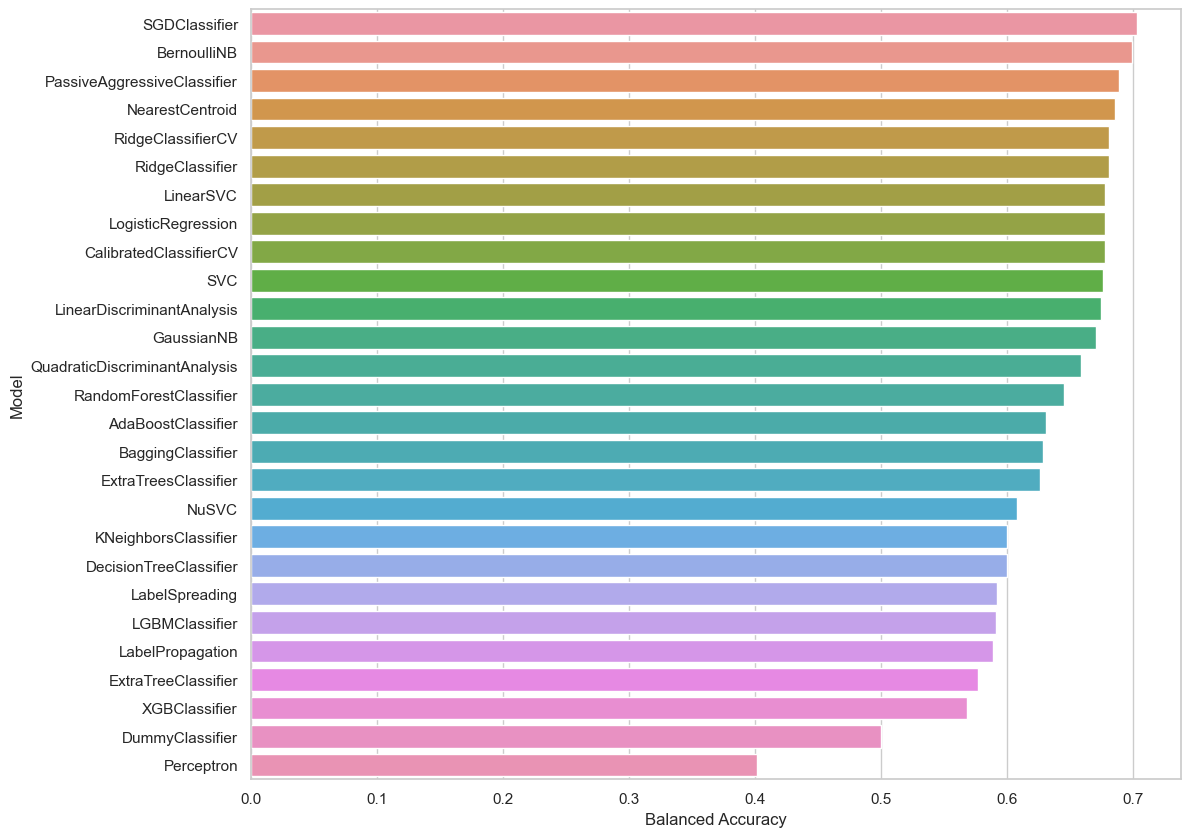

In [25]:
#Visualizando el mejor modelo
plt.figure(figsize=(12, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions.index, x="Balanced Accuracy", data=predictions)

In [54]:
#Utilizare modelo Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [61]:
#Instanciar algoritmo de clasificación RFC
rfc_clf = RandomForestClassifier()
# Aplicar modelo a datos de entrenamietno
classifier = rfc_clf.fit(X_train, y_train)


In [62]:
# Generar predicciones con datos test
y_pred_rfc = classifier.predict(X_test)

In [63]:
#@title Matriz de confusión
confusion_matrix(y_test, y_pred_rfc)

array([[ 44,  53],
       [ 36, 133]], dtype=int64)

In [64]:
# Función para generar métricas
def fn_metricas_clasificacion(y_true, y_pred):
  print('Accuracy     : %.3f' % accuracy_score(y_true, y_pred))
  print("Precisión    : {}".format(precision_score(y_true, y_pred, average=None)))
  print("Recall       : {}".format(recall_score(y_true, y_pred, average=None)))
  print("Puntuación F1: {}".format(f1_score(y_true, y_pred, average=None)))
  print("Cohen Kappa  : {}".format(cohen_kappa_score(y_true, y_pred)))

In [65]:
# Crear función para visualizar métricas
def fn_metricas_info(modelo, y_verdadero, y_calculado):
    metrics = {
        'Accuracy': "%.5f" % accuracy_score(y_verdadero, y_calculado),
        'Precisión': "{}".format(precision_score(y_verdadero, y_calculado, average=None)),
        'Recall': "{}".format(recall_score(y_verdadero, y_calculado, average=None)),
        'Puntuación F1': "{}".format(f1_score(y_verdadero, y_calculado, average=None)),
        'Cohen Kappa': "{}".format(cohen_kappa_score(y_verdadero, y_calculado))
    }
    return pd.DataFrame(metrics, index=[modelo])

In [66]:
#Métricas
fn_metricas_clasificacion(y_test, y_pred_rfc)

Accuracy     : 0.665
Precisión    : [0.55       0.71505376]
Recall       : [0.45360825 0.78698225]
Puntuación F1: [0.49717514 0.74929577]
Cohen Kappa  : 0.2499207908244091


In [67]:
#Mostrar Reporte
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.55      0.45      0.50        97
         1.0       0.72      0.79      0.75       169

    accuracy                           0.67       266
   macro avg       0.63      0.62      0.62       266
weighted avg       0.65      0.67      0.66       266



In [68]:
#Ajustes de Hiperparámetros
from sklearn.model_selection import GridSearchCV

# Generar las particiones
particiones = KFold(n_splits=10, shuffle=True, random_state=0)

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [6,8,12],
    'min_samples_leaf': [4,8,12],
}

# Instanciar el modelo sin hiperparámetros
rf_clf = RandomForestClassifier(class_weight='balanced')

# Aplicar GridSearchCV  usando el diccionario de hiperparámetros
mejor_modelo_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=particiones, scoring='accuracy')

# Entrenar el modelo con datos train
mejor_modelo_rfc.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_modelo_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 25}

In [69]:
# Obtener el mejor modelo
modelo_final = mejor_modelo_rfc.best_estimator_
# Obtener predicciones con el set de test
y_pred = modelo_final.predict(X_test)
# Imprimir reporte de clasificación
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.55      0.45      0.50        97
         1.0       0.72      0.79      0.75       169

    accuracy                           0.67       266
   macro avg       0.63      0.62      0.62       266
weighted avg       0.65      0.67      0.66       266



In [70]:
#Métricas del modelo
metrica = fn_metricas_info('random_forest', y_test, y_pred_rfc)
metrica

,Accuracy,Precisión,Recall,Puntuación F1,Cohen Kappa
random_forest,0.66541,[0.55 0.71505376],[0.45360825 0.78698225],[0.49717514 0.74929577],0.2499207908244091
